In [2]:
import numpy as np
import apogee.tools.read as apread
from matplotlib import pyplot as plt
import pylab as pl

In [3]:
from apogee.tools import bitmask
from astropy.io import fits

In [4]:
allStar = apread.allStar(rmcommissioning=True,main=False,ak=True, akvers = 'targ', adddist=False)

In [5]:
mdwarf_indx = bitmask.bit_set(19,allStar['APOGEE_TARGET1'])
print(mdwarf_indx)

mdwarf_index = []
for z in range(len(mdwarf_indx)):
    b = mdwarf_indx[z]*1
    mdwarf_index.append(b)
#print(mdwarf_index)
from collections import Counter
Counter(mdwarf_index)
print(len(mdwarf_index))

[False False False ..., False False False]
155632


In [6]:
from collections import Counter
Counter(mdwarf_indx)

Counter({False: 154882, True: 750})

In [7]:
locationIDs = allStar['LOCATION_ID']
apogeeIDs = allStar['APOGEE_ID']
J_filter = allStar['J']
J_filterr = allStar['J_ERR']
H_filter = allStar['H']
H_filterr = allStar['H_ERR']
K_filter = allStar['K']
K_filterr = allStar['K_ERR']
SNRs = allStar['SNR']
WISE_4_5 = allStar['WISE_4_5']

In [8]:
location_IDs = []
apogee_IDs = []
J = []
J_err = []
H = []
H_err = []
K = []
K_err = []
SNR = []
wise = []


for i in range(len(mdwarf_index)):
    if mdwarf_index[i] == 1:
        l = locationIDs[i]
        a = apogeeIDs[i]
        j = J_filter[i]
        h = H_filter[i]
        k = K_filter[i]
        j_err = J_filterr[i]
        h_err = H_filterr[i]
        k_err = K_filterr[i]
        s = SNRs[i]
        w = WISE_4_5[i]
        location_IDs.append(l)
        apogee_IDs.append(a)
        J.append(j)
        H.append(h)
        K.append(k)
        J_err.append(j_err)
        H_err.append(h_err)
        K_err.append(k_err)
        SNR.append(s)
        wise.append(w)

In [9]:
print(location_IDs[34], apogee_IDs[34], wise[34])
print(location_IDs[450], apogee_IDs[450],wise[450])
print(location_IDs[738], apogee_IDs[738], wise[738])


4476 b'2M00444820+1830403' -9999.99
4514 b'2M13085124-0131075' -9999.99
4475 b'2M23200703+1150071' -9999.99


In [10]:
WISE = []
J_new = []
H_new = []
for i in range(len(wise)):
    if wise[i] != wise[34]:
        WISE.append(wise[i])
        J_new.append(J[i])
        H_new.append(H[i])
print(len(WISE))
print(len(J_new))
print(len(H_new))

658
658
658


13.998
6.66
15.337
7.406
14.685
7.043


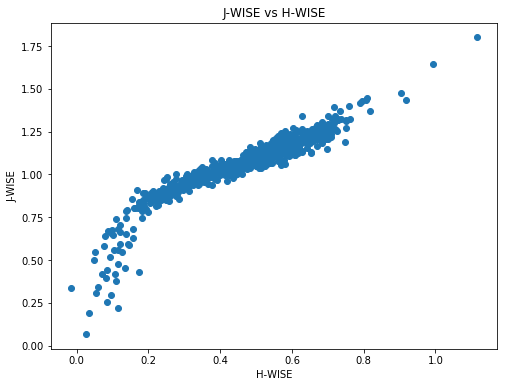

In [11]:
jw = []
hw = []
print(max(WISE))
print(min(WISE))
print(max(J_new))
print(min(J_new))
print(max(H_new))
print(min(H_new))

for r in range(len(J_new)):
    j_w = J_new[r] - WISE[r]
    h_w = H_new[r] - WISE[r]
    jw.append(j_w)
    hw.append(h_w)
plt.figure(figsize=(8,6))
plt.plot(hw,jw,"o")
plt.title('J-WISE vs H-WISE')
plt.xlabel('H-WISE')
plt.ylabel('J-WISE')
plt.savefig('CC_JW_HW',dpi=900)
plt.show()

### Now, let's look at finding the best M-dwarf spectra

Let's begin wiht splitting H-WISE into 10 bins. Then, catagorize the stars into these 10 even incriments. Might be best to make a histogram of this data!

In [37]:
print(max(hw))
print(min(hw))

1.115
-0.0160003


In [17]:
ranges,bin_edges = np.histogram(hw, bins = 10, range=None,normed=True,weights=None,density=True)

In [21]:
print(ranges)

[ 0.22843382  0.6584269   0.98092171  1.28997923  2.39183649  2.40527378
  0.76592517  0.06718642  0.04031185  0.01343728]


In [22]:
print(bin_edges)

[-0.01600027  0.09709973  0.21019974  0.32329974  0.43639975  0.54949975
  0.66259975  0.77569976  0.88879976  1.00189977  1.11499977]


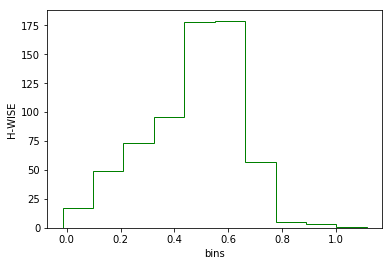

In [34]:
plt.hist(hw,bins=10,color='Green',histtype='step')
plt.xlabel('bins')
plt.ylabel('H-WISE')
plt.show()

In [44]:
best_loc = []
best_apo = []
for i in range(len(hw)):
    if hw[i] >= 0.5:
        if hw[i] < 0.7:
            best_loc.append(location_IDs[i])
            best_apo.append(apogee_IDs[i])
            #print(hw[i])
print(len(best_apo))

304


In [46]:
for k in range(len(best_loc)):
    spectra = apread.apStar(best_loc[k],best_apo[k],ext=1,header=False)[1]
    plt.plot(spectra)

OSError: File apStar-r6-b'2M00024286+1516102'.fits does not appear to exist on the server (as http://data.sdss.org/sas/dr13/apogee/spectro/redux/r6/stars/apo25m/4548/apStar-r6-b'2M00024286+1516102'.fits) ...

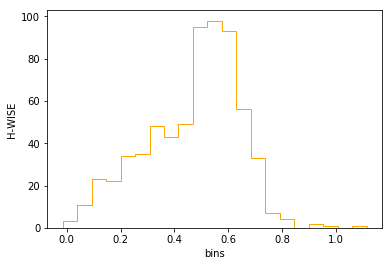

In [36]:
# Auto-generated bins! As you can see, the mean stars lie within the 0.5 - 0.6 range
plt.hist(hw,bins='auto',histtype='step',color='orange')
plt.xlabel('bins')
plt.ylabel('H-WISE')
plt.show()

### OLD CODE

In [72]:
wise = np.array(wise)
print(wise[34])
bad_indx = []
for j in range(len(wise)):
    if wise[j] == wise[34]:
        bad_indx.append(j) 

-9999.99


In [73]:
print(bad_indx)

[34, 35, 37, 40, 52, 53, 66, 200, 204, 205, 212, 215, 216, 217, 221, 226, 227, 230, 233, 234, 236, 244, 249, 252, 263, 268, 270, 271, 273, 275, 279, 296, 299, 303, 304, 310, 312, 319, 320, 322, 323, 336, 337, 338, 340, 341, 345, 347, 357, 363, 373, 398, 417, 419, 431, 435, 447, 448, 450, 452, 453, 454, 457, 459, 460, 461, 467, 475, 476, 490, 494, 504, 509, 520, 523, 524, 531, 537, 542, 544, 549, 554, 555, 557, 558, 567, 577, 579, 588, 660, 738, 744]


In [74]:
print(len(wise))

750


In [11]:
Counter(wise)

Counter({-9999.9902: 76,
         6.6599998: 1,
         6.8990002: 1,
         6.9130001: 1,
         6.927: 1,
         6.9450002: 1,
         7.053: 1,
         7.073: 1,
         7.1030002: 1,
         7.138: 1,
         7.1420002: 1,
         7.1789999: 1,
         7.1890001: 1,
         7.2090001: 1,
         7.283: 1,
         7.3130002: 1,
         7.3509998: 1,
         7.4120002: 1,
         7.5450001: 1,
         7.5630002: 1,
         7.5679998: 1,
         7.5770001: 1,
         7.598: 1,
         7.6269999: 1,
         7.6880002: 1,
         7.6989999: 1,
         7.7189999: 1,
         7.7319999: 1,
         7.7379999: 1,
         7.7529998: 1,
         7.7620001: 1,
         7.8509998: 1,
         7.8540001: 1,
         7.8709998: 1,
         7.8790002: 1,
         7.8889999: 1,
         7.9200001: 1,
         7.9520001: 1,
         7.9990001: 1,
         8.0209999: 1,
         8.1000004: 1,
         8.1149998: 1,
         8.1239996: 1,
         8.1459999: 1,
         8

In [12]:
for i in range(len(J)):
    indx = bad_indx[i]
    del J[indx]

IndexError: list assignment index out of range

In [14]:
print(len(J))

660
